## Import libraries.

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
from matplotlib.cbook import boxplot_stats 
%matplotlib inline

## Get dataset from MySQL database.

In [129]:
def get_login():
	with open("mysql.txt") as f:
		lines = f.read().split("\n")
		for i in lines:
			if i.split("=")[0] == "host":
				host = i.split("=")[1]
			if i.split("=")[0] == "user":
				user = i.split("=")[1]
			if i.split("=")[0] == "passwd":
				passwd = i.split("=")[1]
	return (host, user, passwd)

host, user, passwd = get_login()
mysql_db = mysql.connector.connect(
	host = host,
	user = user,
	passwd = passwd,
	allow_local_infile = True
)
cursor = mysql_db.cursor()

sql = """
    SELECT * FROM ff_scores_db.ff_scores
"""

cursor.execute(sql)
col_names = [i[0] for i in cursor.description]
df = pd.DataFrame(cursor, columns = col_names)

cursor.close()
mysql_db.close()

## Get dataset from CSV.

In [122]:
file_path = "C:/Users/chris/Downloads/winequality-red.csv"
df = pd.read_csv(file_path, sep=";")

## Print raw dataset.

In [123]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Number of rows, columns.

In [77]:
df.shape

(564, 20)

## Column names.

In [78]:
df.columns.values

array(['year', 'week', 'team_1', 'team_1_score', 'team_2', 'team_2_score',
       'win', 'reg', 'playoffs', 'champ_week', 'winner_rd_1',
       'loser_rd_1', 'winner_rd_2', 'loser_rd_2', 'match_34', 'match_56',
       'match_78', 'match_12', 'match_sacko', 'date'], dtype=object)

## Column names, counts, datatypes.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          564 non-null    int64 
 1   week          564 non-null    int64 
 2   team_1        564 non-null    object
 3   team_1_score  564 non-null    object
 4   team_2        564 non-null    object
 5   team_2_score  564 non-null    object
 6   win           564 non-null    int64 
 7   reg           564 non-null    int64 
 8   playoffs      564 non-null    int64 
 9   champ_week    564 non-null    int64 
 10  winner_rd_1   564 non-null    int64 
 11  loser_rd_1    564 non-null    int64 
 12  winner_rd_2   564 non-null    int64 
 13  loser_rd_2    564 non-null    int64 
 14  match_34      564 non-null    int64 
 15  match_56      564 non-null    int64 
 16  match_78      564 non-null    int64 
 17  match_12      564 non-null    int64 
 18  match_sacko   564 non-null    int64 
 19  date    

## Descriptive statistics for each numerical column.

In [80]:
df.describe()

,year,week,win,reg,playoffs,champ_week,winner_rd_1,loser_rd_1,winner_rd_2,loser_rd_2,match_34,match_56,match_78,match_12,match_sacko
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,2017.601064,7.750000,0.473404,0.854610,0.145390,14.519504,0.028369,0.039007,0.005319,0.003546,0.014184,0.014184,0.012411,0.014184,0.014184
std,2.259867,4.202628,0.499735,0.352807,0.352807,0.728493,0.166171,0.193784,0.072803,0.059496,0.118356,0.118356,0.110811,0.118356,0.118356
min,2014.000000,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,0.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,8.000000,0.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.000000,11.000000,1.000000,1.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,16.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Unique values in specified column.

In [10]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## Occurrences of each unique value in specified column.

In [11]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Count Null values in each column.

In [109]:
for i in df.columns.values:
    print(df[i].isnull().value_counts())

False    1599
Name: fixed acidity, dtype: int64
False    1599
Name: volatile acidity, dtype: int64
False    1599
Name: citric acid, dtype: int64
False    1599
Name: residual sugar, dtype: int64
False    1599
Name: chlorides, dtype: int64
False    1599
Name: free sulfur dioxide, dtype: int64
False    1599
Name: total sulfur dioxide, dtype: int64
False    1599
Name: density, dtype: int64
False    1599
Name: pH, dtype: int64
False    1599
Name: sulphates, dtype: int64
False    1599
Name: alcohol, dtype: int64
False    1599
Name: quality, dtype: int64


## Get all outliers in specified (numeric) column.

In [119]:
boxplot_stats(df["fixed acidity"])[0]["fliers"]

array([12.8, 12.8, 15. , 15. , 12.5, 13.3, 13.4, 12.4, 12.5, 13.8, 13.5,
       12.6, 12.5, 12.8, 12.8, 14. , 13.7, 13.7, 12.7, 12.5, 12.8, 12.6,
       15.6, 12.5, 13. , 12.5, 13.3, 12.4, 12.5, 12.9, 14.3, 12.4, 15.5,
       15.5, 15.6, 13. , 12.7, 13. , 12.7, 12.4, 12.7, 13.2, 13.2, 13.2,
       15.9, 13.3, 12.9, 12.6, 12.6])

## Need to drop non-numeric columns before plotting.

In [ ]:
# col_list = []
# df = df[col_list]

## Correlation heatmap. (Drop non-numeric columns before running)

<AxesSubplot:>

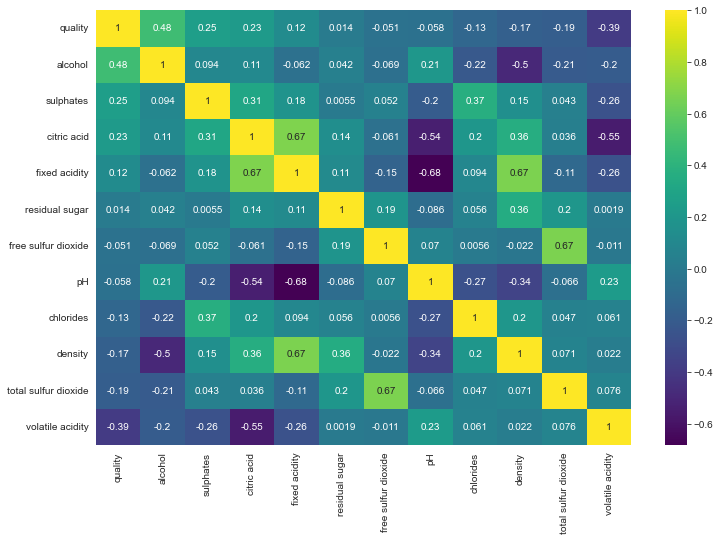

In [128]:
plt.figure(figsize=(12,8))
k = 12 # Number of features.
cols = df.corr().nlargest(k, 'quality')['quality'].index
sns.heatmap(df[cols].corr(),cmap='viridis',annot=True)

## Box plot. (Drop non-numeric columns before running)

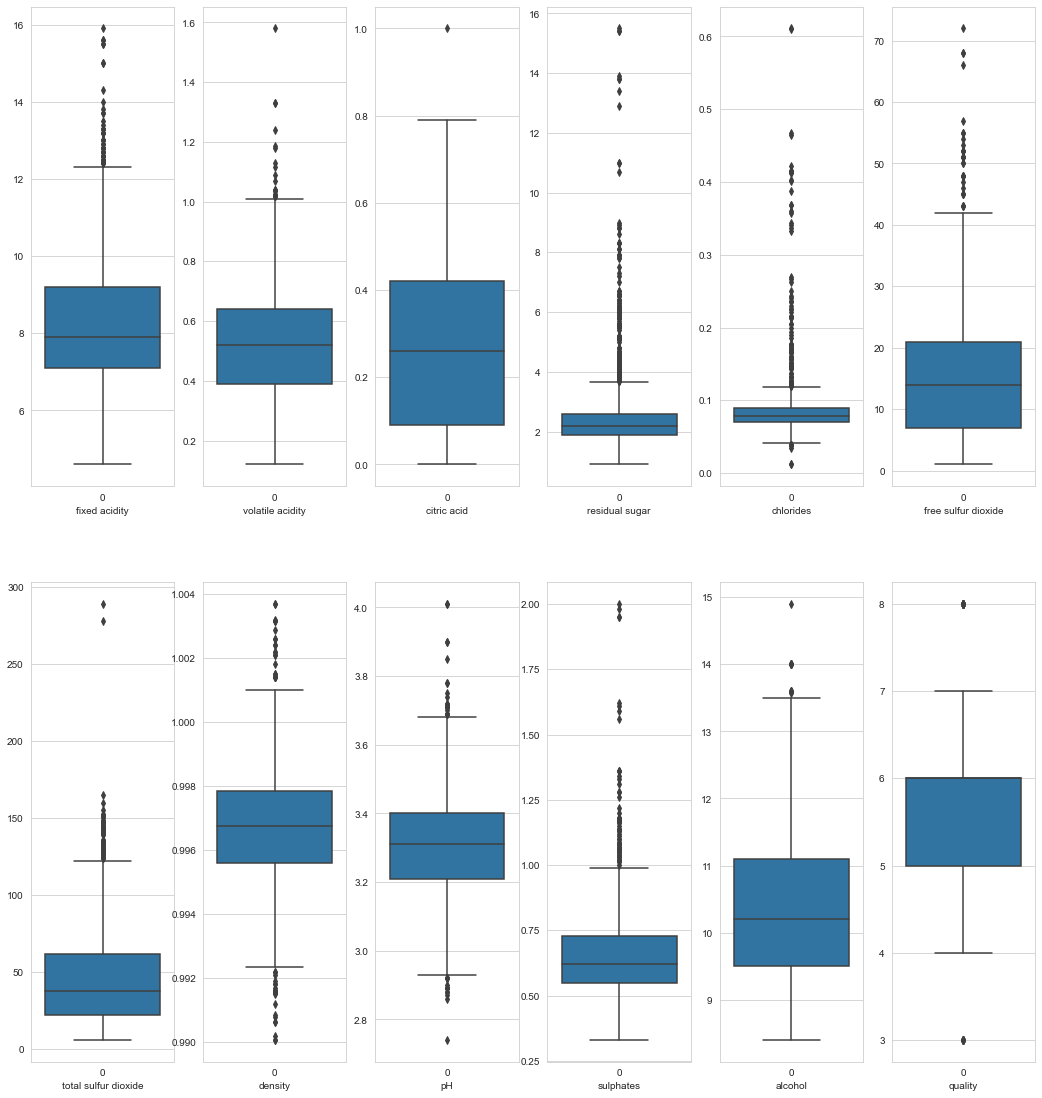

In [126]:
l = df.columns.values
columns = 6
rows = 2

plt.figure(figsize=(3*columns, 15*rows))
for i in range(len(l)):
    sub = plt.subplot(rows + 1, columns, i + 1)
    sns.boxplot(data=df[l[i]], orient="v")
    sub.set_xlabel(l[i])

## Histograms. (Skew, drop non-numeric columns before running)
More outliers on the side with the tail.

Models trained using a feature that has a skew will be better at making predictions where it has more data points. Skewed features need to be transformed (power, log, exponential) before used in machine learning processes.

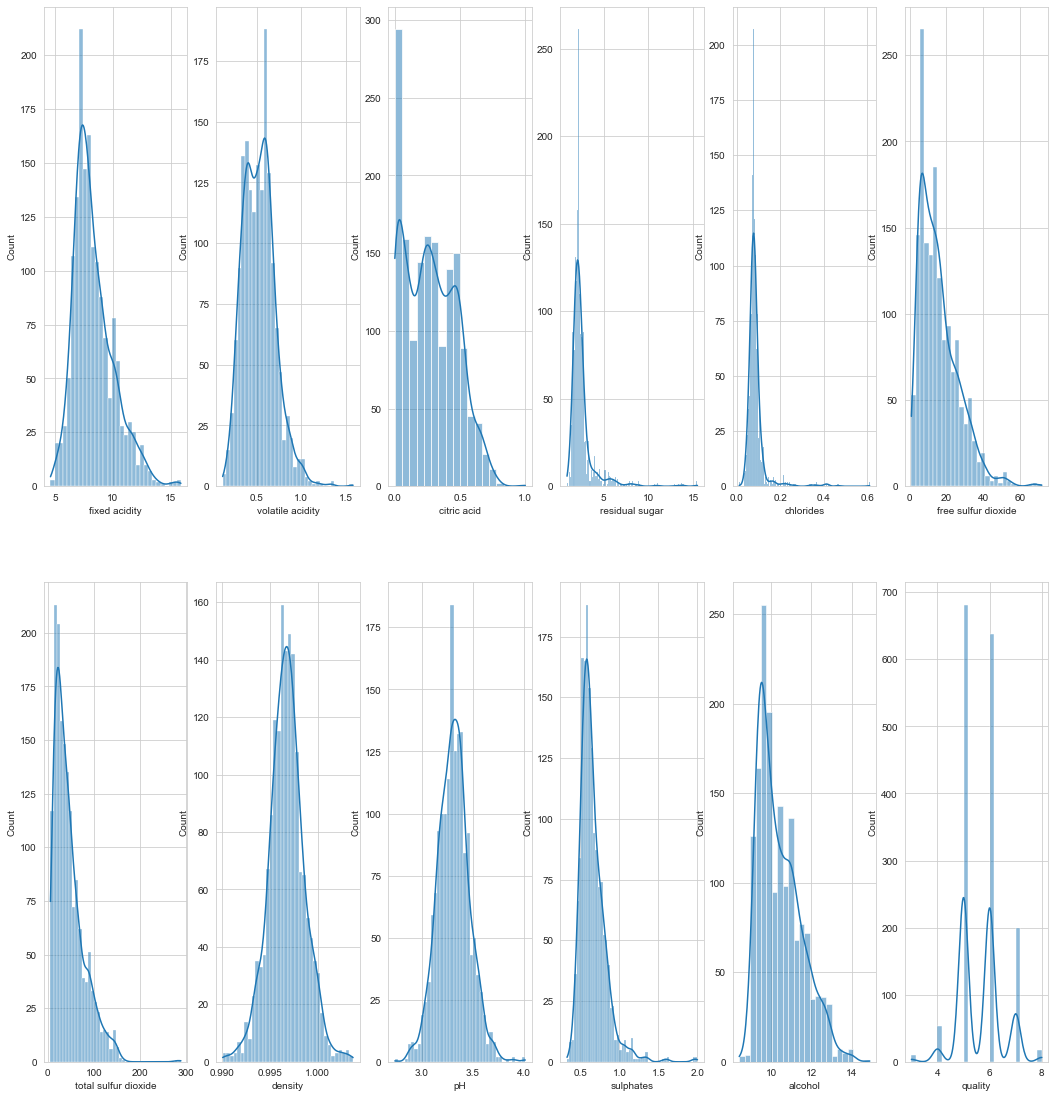

In [125]:
l = df.columns.values
columns = 6
rows = 2

plt.figure(figsize=(3*columns, 15*rows))
for i in range(len(l)):
    plt.subplot(rows + 1, columns, i+1)
    sns.histplot(df[l[i]], kde=True)